# Feature Engineering and Model Building

In [1]:
# Importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics  import roc_auc_score,accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import classification_report
from IPython.display import display, HTML
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
relative_path = 'Website Phishing Problem Statement and EDA .ipynb'

# Generate the hyperlink
html_link = f"""For Detailed EDA report please refer <a href="{relative_path}" target="_blank">EDA Notebook</a>"""

# Display the hyperlink
display(HTML(html_link))

 ### Train, validation and test split

In [3]:
df = pd.read_csv('clean_data.csv')
df['Result'] = df['Result'].apply(lambda x: 0 if x==-1 else 1)
X = df.drop(columns=['Result','Unnamed: 0'],axis=1)
y = df['Result']
features = X.columns
print(X.shape,y.shape)
df['Result'].value_counts()

(11055, 30) (11055,)


1    6157
0    4898
Name: Result, dtype: int64

In [4]:
X = X.to_numpy()
y = y.to_numpy()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
def load_model_from_pickle(file_path):
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    return model

### No Need of Data Scaling 

**Data scaling** techniques like normalization or standardization are primarily used for numerical features that have a wide range of values. These techniques aim to rescale the values to a common scale to prevent any particular feature from dominating the learning process.
<br/>
However, since your features consist of discrete values (-1, 0, and 1), there is no need for scaling. Categorical or ordinal features already have a defined order or grouping, and their values carry a specific meaning. By applying scaling, you would risk losing the inherent structure and meaning of the data.

### Model 1: Logistic Regression 

The provided code utilizes a logistic regression model to classify whether a website is phishing or not based on a set of 30 input features. Logistic regression is a supervised learning algorithm commonly used for binary classification tasks. In this scenario, the goal is to predict whether a website is involved in phishing activities or not.
<br/>
The logistic regression model takes into account 30 specific features extracted from the website data. These features serve as input variables for the logistic regression algorithm, which analyzes their relationship with the target variable - the phishing classification.
<br/>
The logistic regression model learns from a labeled dataset, where each website is labeled as either phishing or non-phishing. During the training process, the model estimates the coefficients for each feature, representing the strength and direction of their influence on the classification outcome. By applying a logistic function to the linear combination of the feature values and their corresponding coefficients, the model calculates the probability of a website being classified as phishing.
<br/>
By using logistic regression, this code provides a powerful and interpretable approach to analyze the relationship between the 30 website features and the classification of phishing activities. The model allows for the identification of important features that contribute significantly to the classification, aiding in the detection and prevention of potential phishing websites.

In [24]:
# Defining the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization penalty ('l1', 'l2', 'elasticnet')
    "C": np.logspace(-4, 4, 10),  # Inverse of regularization strength
    'l1_ratio': [0.1, 0.5, 0.9],  # Elastic Net mixing parameter (used only when penalty='elasticnet') 
    'max_iter': [100, 150, 200, 250, 300], # Maximum number of iterations
    "solver": ['liblinear', 'newton-cg', 'lbfgs', 'sag','saga'] # Determines the optimization algorithm used to fit the logistic regression model
}

# Create the Logistic Regression classifier
lr = LogisticRegression(random_state=42)

# Perform GridSearchCV to find the best model
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_lr = grid_search.best_estimator_
best_params = grid_search.best_params_

In [25]:
print('Best parameters for Logistic Regression')
print(best_params)
y_pred = best_lr.predict(X_test)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision score
precision = precision_score(y_test, y_pred)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('For Logistic Regression')
print("AUC-ROC Score:", auc_roc)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Best parameters for Logistic Regression
{'C': 21.54434690031882, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
For Logistic Regression
AUC-ROC Score: 0.921479354548334
Accuracy Score: 0.9240162822252375
Precision Score: 0.9269442262372348
Recall Score: 0.9402390438247012
F1 Score: 0.9335443037974683


In [26]:
feature_importance_lr = abs(best_lr.coef_[0])

# Create a DataFrame to display the feature importance
feature_importance_lr_df = pd.DataFrame({'Feature': features, 'Importance_lr': feature_importance_lr})

# Sort the DataFrame by importance in descending order
feature_importance_lr_df = feature_importance_lr_df.sort_values(by='Importance_lr', ascending=False)

# Print the feature importance
print("Feature Importance for Logistic Regression")
print(feature_importance_lr_df)


Feature Importance for Logistic Regression
                        Feature  Importance_lr
5                 Prefix_Suffix       4.316027
13                URL_of_Anchor       3.263872
7                SSLfinal_State       1.617506
18                     Redirect       1.178125
28       Links_pointing_to_page       0.906898
15                          SFH       0.870889
14                Links_in_tags       0.855125
25                  web_traffic       0.818515
2            Shortining_Service       0.768011
27                 Google_Index       0.691857
0             having_IP_Address       0.689011
6             having_Sub_Domain       0.621159
10                         port       0.598792
24                    DNSRecord       0.578529
11                  HTTPS_token       0.514591
16          Submitting_to_email       0.404729
29           Statistical_report       0.338897
9                       Favicon       0.332280
22                       Iframe       0.322757
19               

In [27]:
model_file = 'model_lr_1.pkl'

# Save the model to a pickle file
with open(model_file, 'wb') as f:
    pickle.dump(best_lr, f)

In [28]:
pickle_file_path = 'model_lr_1.pkl'
best_lr = load_model_from_pickle(pickle_file_path)
y_pred = best_lr.predict(X_test)
# Print classification report
print("Classification Report of Logistic Regression:")
print(classification_report(y_test, y_pred))

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       956
           1       0.93      0.94      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



### Model 2: K Nearest Neighbour Classification

The **k-Nearest Neighbors (kNN) algorithm** is a simple and intuitive classification algorithm used for both supervised and unsupervised learning tasks. In the context of supervised learning, kNN is a non-parametric method that assigns a class label to a new data point based on the majority class labels of its k nearest neighbors in the feature space. The algorithm assumes that similar data points tend to belong to the same class. The value of k, which represents the number of neighbors to consider, is a hyperparameter that can be chosen based on the dataset and problem at hand.

In the case of classifying websites as phishing or non-phishing, the kNN algorithm can be applied using 30 input features that capture various characteristics of the websites. The algorithm takes these feature values as input and compares them with the feature values of known websites in the training dataset. It then identifies the k nearest neighbors based on distance metric and assigns the majority class label among those neighbors to the new website.

In [29]:
# Defining the parameter grid
param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7], # No of neighbour 
    'weights': ['uniform', 'distance'], # weight function
    'p': [1, 2] # he power parameter for the Minkowski distance metric 
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform GridSearchCV to find the best model
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

In [30]:
print('Best parameters for KNN')
print(best_params)
y_pred = best_knn.predict(X_test)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision score
precision = precision_score(y_test, y_pred)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('For KNN')
print("AUC-ROC Score:", auc_roc)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Best parameters for KNN
{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
For KNN
AUC-ROC Score: 0.9588837120138692
Accuracy Score: 0.9611035730438715
Precision Score: 0.9569976544175137
Recall Score: 0.9752988047808765
F1 Score: 0.9660615627466456


In [31]:
model_file = 'model_knn_1.pkl'

# Save the model to a pickle file
with open(model_file, 'wb') as f:
    pickle.dump(best_knn, f)

In [32]:
pickle_file_path = 'model_knn_1.pkl'
best_knn = load_model_from_pickle(pickle_file_path)
y_pred = best_knn.predict(X_test)
# Print classification report
print("Classification Report of KNN:")
print(classification_report(y_test, y_pred))

Classification Report of KNN:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



### Model 3: Random Forest Classifier

**Random Forest** is an ensemble learning algorithm that combines multiple decision trees to make predictions. By training on a labeled dataset, where websites are categorized as phishing or non-phishing, the Random Forest model learns the relationships between these features and the target variable. This allows it to effectively classify new websites as either phishing or non-phishing based on the provided input features. The ensemble nature of Random Forest ensures robustness and generalization, making it a popular choice for classification tasks, including the identification of potential phishing websites.

In [44]:
# Defining the parameter grid
param_grid = {
    'n_estimators': [100,150,200], # Number of Trees 
    'max_depth': [1,2,3,4,5, 10], # Maximum depth of the tree
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'], # Number of features to consider while looking for best split
    'criterion':['gini', 'entropy', 'log_loss'] # Criteria used for spliting
}
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5,scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

In [45]:
print('Best parameters for Random Forest Classifier')
print(best_params)
y_pred = best_rf.predict(X_test)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision score
precision = precision_score(y_test, y_pred)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('For Random Forest Classifier')
print("AUC-ROC Score:", auc_roc)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Best parameters for Random Forest Classifier
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}
For Random Forest Classifier
AUC-ROC Score: 0.9472528296854423
Accuracy Score: 0.9511533242876526
Precision Score: 0.9401381427475057
Recall Score: 0.9760956175298805
F1 Score: 0.9577795152462862


In [46]:
model_file = 'model_rf_1.pkl'

# Save the model to a pickle file
with open(model_file, 'wb') as f:
    pickle.dump(best_rf, f)

In [47]:
pickle_file_path = 'model_rf_1.pkl'
best_rf = load_model_from_pickle(pickle_file_path)
y_pred = best_rf.predict(X_test)
# Print classification report
print("Classification Report of Random Forest:")
print(classification_report(y_test, y_pred))

Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       956
           1       0.94      0.98      0.96      1255

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



### Model 4: Kernel SVM

The **Support Vector Machine (SVM) algorithm** is a powerful supervised learning method commonly used for binary classification tasks. It works by finding an optimal hyperplane that separates the data into different classes while maximizing the margin between the hyperplane and the closest data points from each class. SVMs are particularly useful when dealing with high-dimensional feature spaces, making them suitable for classifying websites based on a set of 30 input features.
<br/>
By utilizing the SVM algorithm, we can effectively perform binary classification of websites based on their features, distinguishing between phishing and non-phishing websites. SVMs have the advantage of being able to handle high-dimensional feature spaces and are effective at finding the optimal decision boundary.

In [64]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1,1],  # Regularization parameter
    'gamma': [0.1, 0.01],  # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
    'kernel': ['rbf', 'poly', 'sigmoid'],  # Kernel type
    'coef0': [0.1, 0.5, 1.0]
}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5,scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 1, 'coef0': 1.0, 'gamma': 0.1, 'kernel': 'poly'}


In [65]:
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision score
precision = precision_score(y_test, y_pred)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('For Random Forest Classifier')
print("AUC-ROC Score:", auc_roc)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

For Random Forest Classifier
AUC-ROC Score: 0.9599051492773675
Accuracy Score: 0.9615558570782451
Precision Score: 0.9606299212598425
Recall Score: 0.9721115537848606
F1 Score: 0.9663366336633663
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       956
           1       0.96      0.97      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [55]:
model_file = 'model_svm_1.pkl'

# Save the model to a pickle file
with open(model_file, 'wb') as f:
    pickle.dump(best_svm, f)

### Model 5: XGBoost Classifier

**XGBoost, short for Extreme Gradient Boosting**, is a powerful and widely used machine learning algorithm known for its exceptional performance in various domains, including classification tasks. The XGBoost classifier is an optimized implementation of the gradient boosting framework, which combines the strength of multiple weak prediction models, such as decision trees, to create a strong ensemble model. It leverages gradient boosting techniques to iteratively build new models that correct the mistakes made by the previous models, resulting in improved predictive accuracy.
<br/>
We can utilize the XGBoost algorithm to classify the website as phishing or non-phishing. Given the input features of the website it classifies the website as phishing or non-phishing.

In [56]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5],  # Maximum tree depth
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'n_estimators': [100, 200, 300],  # Number of trees
}

# Create an instance of the XGBoost classifier
xgb = XGBClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5,scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [60]:
# Evaluate the best model on the test set
best_xgbc = grid_search.best_estimator_
y_pred = best_xgbc.predict(X_test)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision score
precision = precision_score(y_test, y_pred)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('For Random Forest Classifier')
print("AUC-ROC Score:", auc_roc)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


For Random Forest Classifier
AUC-ROC Score: 0.9637400190034838
Accuracy Score: 0.9656264133876075
Precision Score: 0.9623529411764706
Recall Score: 0.9776892430278884
F1 Score: 0.9699604743083005
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.97      0.97      0.97      2211



In [61]:
model_file = 'model_xgb_1.pkl'

# Save the model to a pickle file
with open(model_file, 'wb') as f:
    pickle.dump(best_xgbc, f)

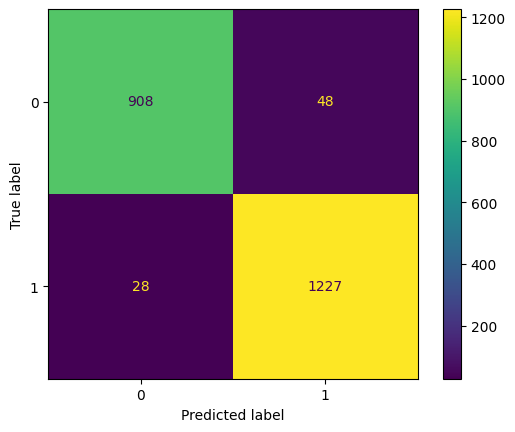

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_xgb = load_model_from_pickle('model_xgb_1.pkl')
y_pred = best_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=best_xgb.classes_)
dis = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_xgb.classes_)
dis.plot()